3


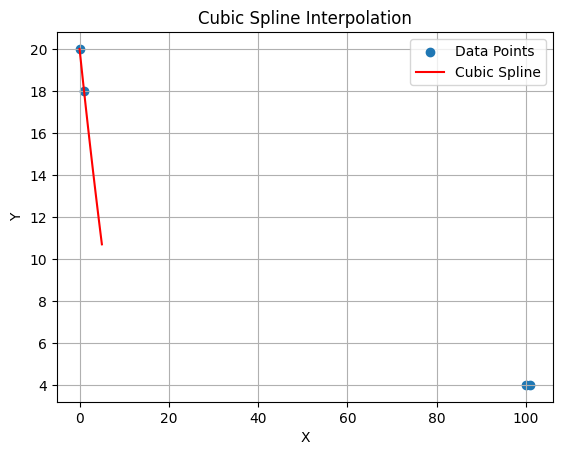

In [7]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Generate some sample data points
x = np.array([0, 1, 2, 3, 4, 5])

y = np.array([0, 1, 4, 9, 16, 25])




x = np.array([0, 1, 100, 101])

y = np.array([20, 18, 4, 4])

# Create a cubic spline interpolation function
cs = CubicSpline(x, y)

# Generate points for plotting the spline
x_interp = np.linspace(0, 5, 100)
y_interp = cs(x_interp)

# Plot original data points and the cubic spline
plt.scatter(x, y, label='Data Points')
plt.plot(x_interp, y_interp, label='Cubic Spline', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.grid(True)
plt.show()

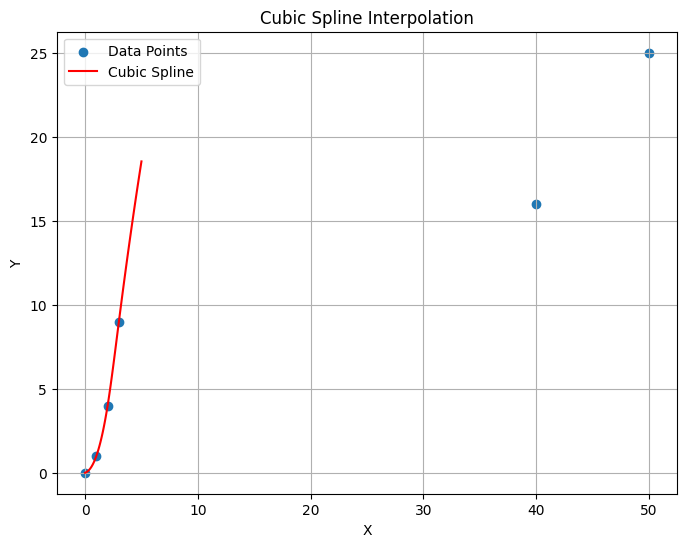

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Sample data points
x_data = np.array([0, 1, 2, 3, 40, 50])
y_data = np.array([0, 1, 4, 9, 16, 25])

# Create a cubic spline interpolation
cubic_spline = CubicSpline(x_data, y_data)

# Generate points for plotting the spline
x_interp = np.linspace(0, 5, 100)
y_interp = cubic_spline(x_interp)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_interp, y_interp, label='Cubic Spline', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.grid(True)
plt.show()


In [18]:


import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer

In [14]:
def f(x):
    """Function to be approximated by polynomial interpolation."""
    return x * np.sin(x)


# whole range we want to plot
x_plot = np.linspace(-1, 11, 100)

In [15]:
x_train = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
x_train = np.sort(rng.choice(x_train, size=20, replace=False))
y_train = f(x_train)

# create 2D-array versions of these arrays to feed to transformers
X_train = x_train[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

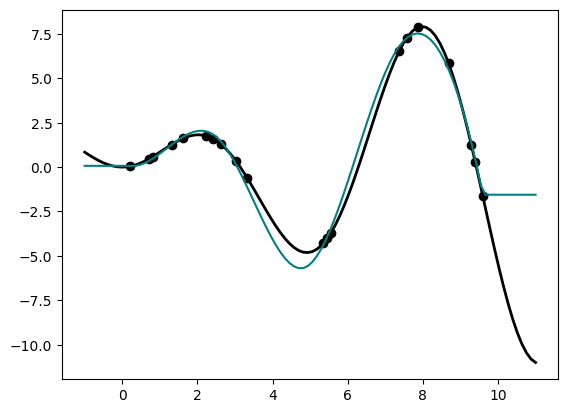

In [21]:
# plot function
lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")

model = make_pipeline(SplineTransformer(), Ridge(alpha=1e-3))
model.fit(X_train, y_train)

y_plot = model.predict(X_plot)

ax.plot(x_plot, y_plot, label="B-spline")

plt.show()

In [2]:
import tools


In [3]:
from ipyleaflet import Map, Polyline
from ipywidgets import Layout

In [4]:
approach_camera_points = [
    (53.560492, 37.701443),
    (55.017909, 37.478200),
    (55.535780, 36.658543),
    (55.542437, 36.545351),
]

approach_target_points = [
    (55.750916, 37.616948),
    (55.585251, 36.568696),
]

approach_camera_spliens_gdf = tools.gdf2splines(tools.points2gdf(approach_camera_points))

approach_target_spliens_gdf = tools.points2gdf(approach_target_points)

m = Map(center=approach_target_points[-1], zoom=9, layout=Layout(width='100%', height='700px'))


m.add(tools.gdf2line(approach_camera_spliens_gdf, 'brown'))

m.add(tools.gdf2line(approach_target_spliens_gdf, 'yellow'))

m

Map(center=[55.585251, 36.568696], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [8]:
import tools

def reverse_coords(coords):
    return [(c[1], c[0]) for c in coords]

tools.export_js('mskappr', 'camera', reverse_coords(approach_camera_points))

tools.export_js('mskappr', 'target', reverse_coords(approach_target_points))


🚀 Export. Path and Variable: 
maps/notebook/data-output/mskappr-camera.js

cameraCoordinates

<script src="https://andrewalevin.github.io/maps/notebook/data-output/mskappr-camera.js"></script>

<script src="/Users/andrewlevin/Desktop/maps/notebook/data-output/mskappr-camera.js"></script>

🚀 Export. Path and Variable: 
maps/notebook/data-output/mskappr-target.js

targetCoordinates

<script src="https://andrewalevin.github.io/maps/notebook/data-output/mskappr-target.js"></script>

<script src="/Users/andrewlevin/Desktop/maps/notebook/data-output/mskappr-target.js"></script>



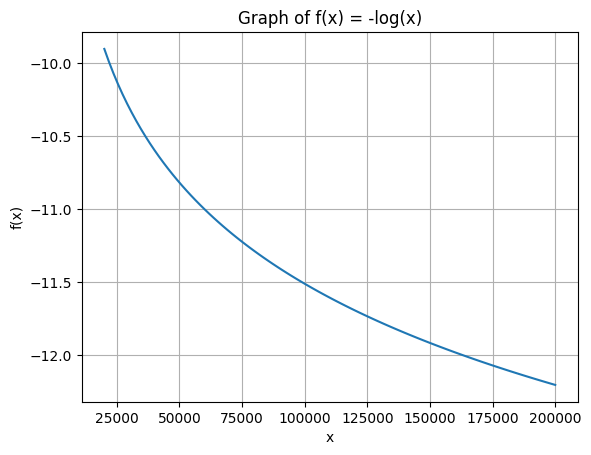

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -np.log(x)

# Define the range of x values
x_values = np.linspace(200000, 20000, 100)  # 100 points between 200000 and 20000

# Compute the corresponding y values
y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) = -log(x)')
plt.grid(True)
plt.show()


In [15]:
import numpy as np

def log_function(x):
    if x <= 1:
        return 200000
    elif 1 < x <= 1.5:
        return 20000 * np.log(1.5) / np.log(x)
    elif 1.5 < x <= 2:
        return 10000 * np.log(2) / np.log(x)
    else:
        return None

# Example usage:
print(log_function(1))    # Output: 200000
print(log_function(1.5))  # Output: Approximately 63326.23
print(log_function(1.8))  # Output: Approximately 17677.18
print(log_function(2))    # Output: 10000
print(log_function(2.5))  # Output: None (since it's outside the defined range)

200000
20000.0
11792.495848393759
10000.0
None


In [ ]:
# STRAIGHT APPROACH



In [64]:
approach_camera_points = [
    (55.751426, 37.618879),
    (55.017909, 37.478200),
    (55.535780, 36.658543),
    (55.542437, 36.545351),
]

approach_target_points = [
    (55.585251, 36.568696),
    (55.750916, 37.616948),
]

approach_camera_spliens_gdf = tools.gdf2splines(tools.points2gdf(approach_camera_points))

approach_target_spliens_gdf = tools.points2gdf(approach_target_points)

m = Map(center=approach_target_points[-1], zoom=9, layout=Layout(width='100%', height='700px'))


m.add(tools.gdf2line(approach_camera_spliens_gdf, 'brown'))

m.add(tools.gdf2line(approach_target_spliens_gdf, 'yellow'))



Map(center=[55.750916, 37.616948], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [101]:
import geopy.distance

def get_distance(points = []):
    total = 0

    for idx, point in enumerate(points):
        if idx == 0:
            continue
        coords_1 = (points[idx - 1][0], points[idx - 1][1])
        coords_2 = (points[idx][0], points[idx][1])

        dist = geopy.distance.geodesic(coords_1, coords_2).m
        total += dist
    return total
    

def get_rhombus_path(rounds=1, center=[55.751426, 37.618879], delta=0.0001):
    rhombus_points = [
        (center[0]-delta, center[1]),
        (center[0], center[1]+delta),
        (center[0]+delta, center[1]),
        (center[0], center[1]-delta),
    ]
    
    points = []
    for round in range(rounds):
        points += rhombus_points

    segemnet_distance = get_distance([rhombus_points[0], rhombus_points[1]])
    total_distance = int(4.*segemnet_distance*rounds-1.)
    print('📐 total_distance: ', total_distance, 'meters')
    
    return tools.points2gdf(points)



center = [55.751426, 37.618879]

target_gdf = get_rhombus_path(1000, center)




delta_target = [-1.5, 0]
delta_camera = [-10, 0]

camera_points = [
    (center[0] + delta_camera[0], center[1] + delta_camera[1]),
    (center[0] + delta_target[0], center[1] + delta_target[1])
]
print(camera_points)

camera_gdf = tools.points2gdf(camera_points)


m = Map(center=center, zoom=4)

m.add(tools.gdf2line(target_gdf, 'red'))

m.add(tools.gdf2line(camera_gdf, 'green'))

m

📐 total_distance:  51128 meters
[(45.751426, 37.618879), (54.251426, 37.618879)]


Map(center=[55.751426, 37.618879], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [99]:
tools.export_js('mskappr1one', 'camera', reverse_coords(tools.gdf2coords(camera_gdf)))

tools.export_js('mskappr1one', 'target', reverse_coords(tools.gdf2coords(target_gdf)))


🚀 Export. Path and Variable: 
maps/notebook/data-output/mskappr1one-camera.js

cameraCoordinates

<script src="https://andrewalevin.github.io/maps/notebook/data-output/mskappr1one-camera.js"></script>

<script src="/Users/andrewlevin/Desktop/maps/notebook/data-output/mskappr1one-camera.js"></script>

🚀 Export. Path and Variable: 
maps/notebook/data-output/mskappr1one-target.js

targetCoordinates

<script src="https://andrewalevin.github.io/maps/notebook/data-output/mskappr1one-target.js"></script>

<script src="/Users/andrewlevin/Desktop/maps/notebook/data-output/mskappr1one-target.js"></script>



In [100]:
# Approach 2



In [194]:
import numpy as np


route_point = np.array([55.585876, 36.566525])

region_point = np.array([55.751426, 37.618879])

curve_size_delta = 0.05
state1 = {
    'camera': region_point + np.array([-1.5, 0]),
    'target': region_point
}

state2 = {
    'camera': route_point + np.array([-0.05, 0]),
    'target': route_point
}


m = Map(center=center, zoom=8, layout=Layout(width='100%', height='700px'))


curve_delta = 0.01
stage2_camera_points = [
    state1['camera'],
    state1['camera'] + np.array([+curve_delta, 0]),
    state2['camera'] + np.array([0, +curve_delta]),
    state2['camera']
]
stage2_camera_curve = tools.gdf2splines(tools.points2gdf(stage2_camera_points))
m.add(tools.gdf2line(stage2_camera_curve, 'blueviolet'))


stage2_target_points = [
    state1['target'],
    state2['target']
]
m.add(tools.gdf2line(tools.points2gdf(stage2_target_points), 'red'))


curve_delta = 0.05
stage2_target_points = [
    state1['target'],
    state1['target'] + np.array([-curve_delta, 0]),
    state2['target'] + np.array([0, +curve_delta]),
    state2['target']
]
stage2_target_curve = tools.gdf2splines(tools.points2gdf(stage2_target_points))
m.add(tools.gdf2line(stage2_target_curve, 'orange'))




m


Map(center=[55.751426, 37.618879], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [195]:
import pathlib
import utils
import string
import tools
import json


data_js = {
    'camera':{
        'route': reverse_coords(tools.gdf2coords(stage2_camera_curve)),
        'altitude': [100000, 5000],
        'altitude_function': 'linear',
    },
    'target': {
        'route': reverse_coords(stage2_target_points)
    }
}





def export_js_v5(name, data, output_root='data-output', ):
    export_js_template = string.Template('''
const $name = $jsdata;
''')
    tag = string.Template('''<script src="$path"></script>''')

    root = pathlib.Path(output_root)
    file = root.joinpath(f'{name}.js')
    text_data = export_js_template.substitute(
        name=name,
        jsdata=json.dumps(data, indent=4)
    )
    print('🚀 Export. Path and Variable: ')
    print(file.resolve().relative_to(file.resolve().parent.parent.parent.parent))
    print()


    remote_path = f'https://andrewalevin.github.io/{file.resolve().relative_to(file.resolve().parent.parent.parent.parent)}'
    print(tag.substitute(path=remote_path))
    print()

    print(tag.substitute(path=file.resolve()))
    print()

    utils.write_file(file, text_data)

export_js_v5('stage2', data_js)


🚀 Export. Path and Variable: 
maps/notebook/data-output/stage2.js

<script src="https://andrewalevin.github.io/maps/notebook/data-output/stage2.js"></script>

<script src="/Users/andrewlevin/Desktop/maps/notebook/data-output/stage2.js"></script>



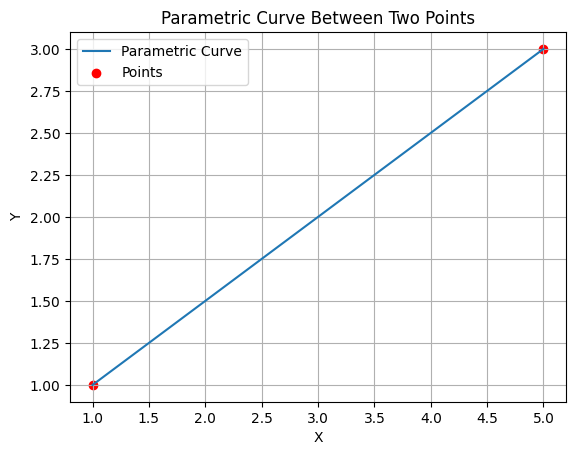

In [115]:
def parametric_curve(t, p0, p1):
    return (1 - t) * p0 + t * p1

# Define the points
point1 = np.array([1, 1])  # Example point 1
point2 = np.array([5, 3])  # Example point 2

# Generate values for the parameter t
t_values = np.linspace(0, 1, 100)

# Generate x and y values for the parametric curve using linear interpolation
x_values = parametric_curve(t_values, point1[0], point2[0])
y_values = parametric_curve(t_values, point1[1], point2[1])

# Plot the parametric curve
plt.plot(x_values, y_values, label='Parametric Curve')
plt.scatter([point1[0], point2[0]], [point1[1], point2[1]], color='red', label='Points')
plt.title('Parametric Curve Between Two Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

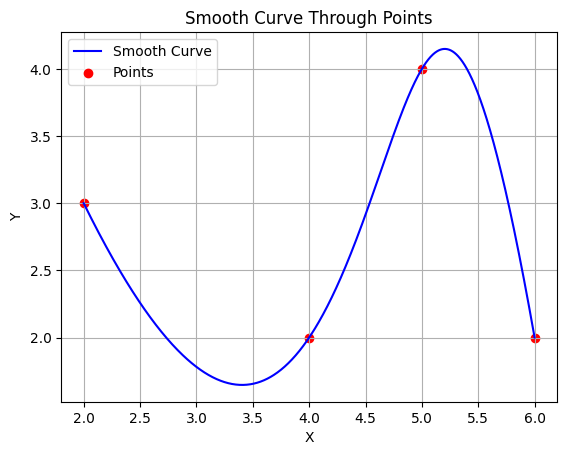

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splprep

# Define the points
points = np.array([ [2, 3], [4, 2], [5, 4], [6, 2]])

# Perform spline interpolation,
tck, u = splprep(points.T, s=0)
u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = splev(u_new, tck)

# Plot the interpolated curve
plt.plot(x_new, y_new, label='Smooth Curve', color='blue')
plt.scatter(points[:, 0], points[:, 1], color='red', label='Points')
plt.title('Smooth Curve Through Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()